## importing all the neccessary libraries

In [34]:
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image

from Models import Style_Transfer_Network
from Helper import imload, imshow

## loading the images

In [35]:
content = 'varanasi.jpg'
styles = ['art.png', 'art2.jpg']

## loading the training checkpoint for the model

In [36]:
check_point = torch.load("check_point.pth", map_location="cpu")

## loading the Style Transfer Model

In [37]:
transfer_network = Style_Transfer_Network()
transfer_network.load_state_dict(check_point['state_dict'])

/home/vaibhav/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vaibhav/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/vaibhav/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [38]:
style_strength = 1.0
interpolation_weights=[1.0]

In [39]:
content_img = imload(content, imsize=512)
style_imgs = [imload(style, imsize=512, cropsize=512, cencrop=True) for style in styles]

In [40]:
content_img = imload(content, imsize=512)
style_imgs = [imload(style, imsize=512, cropsize=512, cencrop=True) for style in styles]

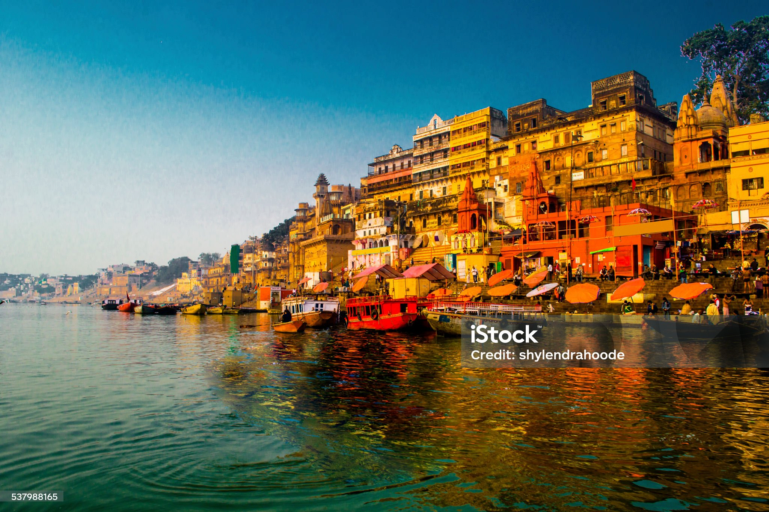

In [41]:
imshow(content_img)

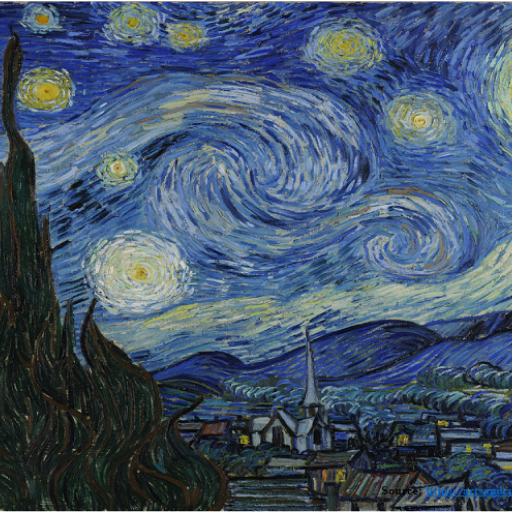

In [42]:
imshow(style_imgs[0])

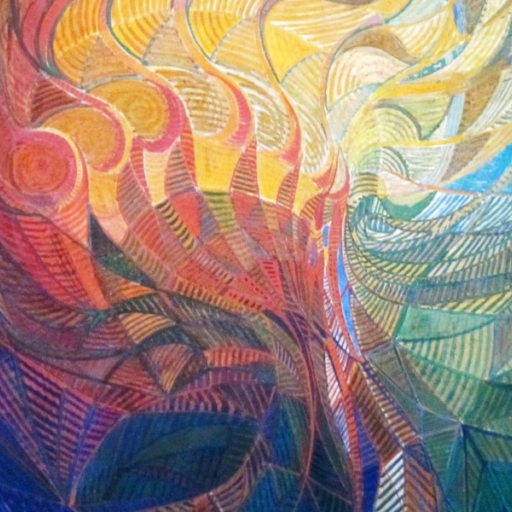

In [43]:
imshow(style_imgs[1])

## Simple Style Transfer from art to content

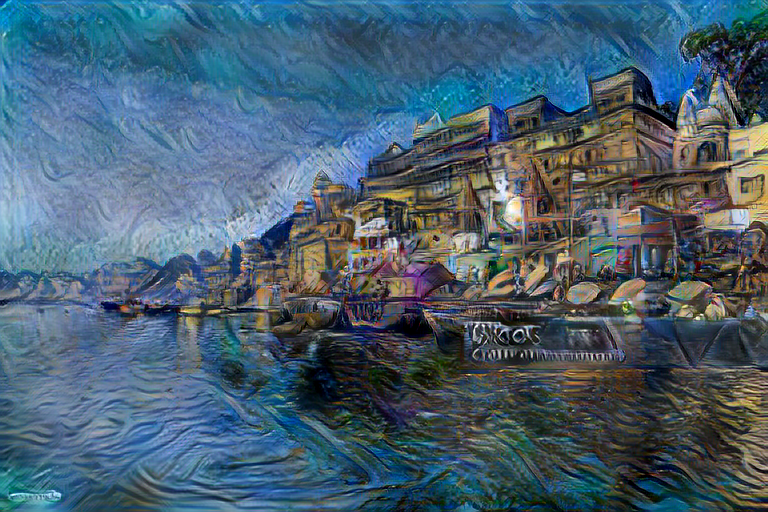

In [44]:
with torch.no_grad():
    stylized_img = transfer_network(content_img, style_imgs, style_strength, interpolation_weights)
imshow(stylized_img)

## Style Transfer with color preservation

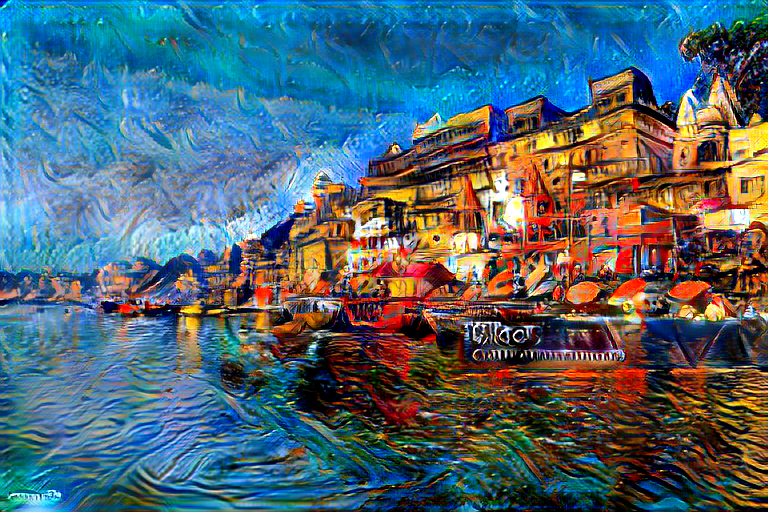

In [45]:
with torch.no_grad():
    stylized_img = transfer_network(content_img, style_imgs, style_strength, interpolation_weights, preserve_color=True)
imshow(stylized_img)

## Interploation of Style Transfer between two art styles

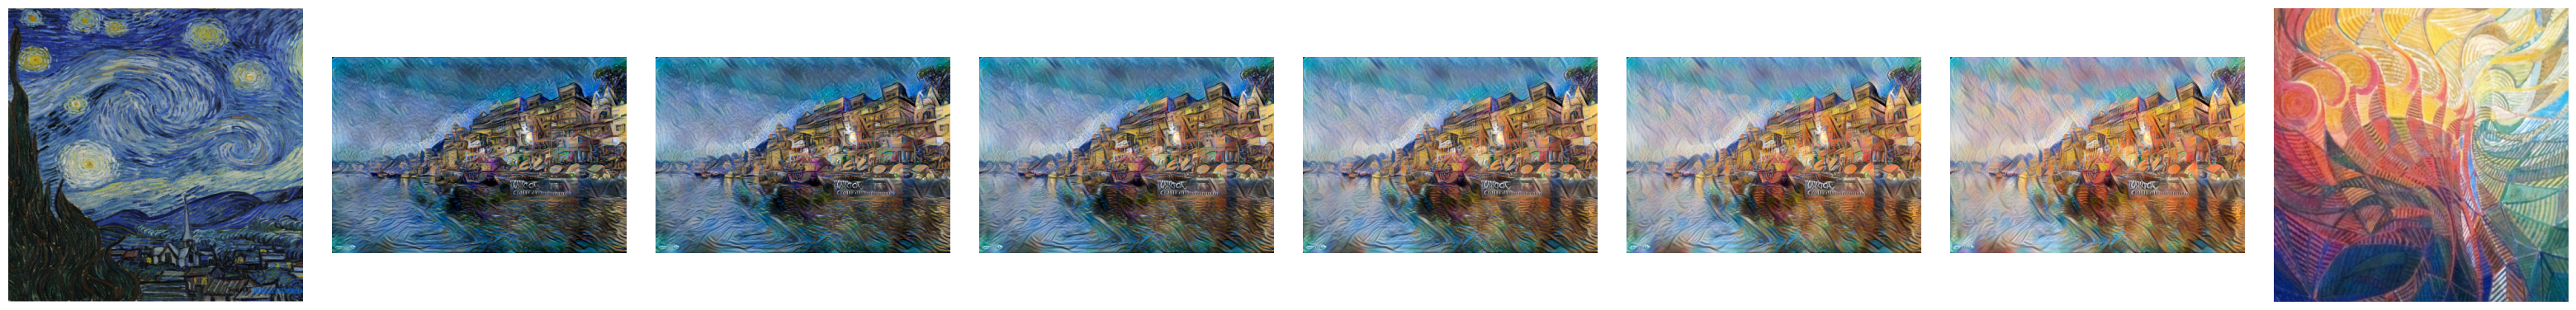

In [46]:
plt.figure(figsize=(40, 10))
plt.subplots_adjust(wspace=0.1)
plt.subplot(1, 8, 1)
plt.imshow(imshow(style_imgs[0])); plt.axis('off')
plt.subplot(1, 8, 8)
plt.imshow(imshow(style_imgs[1])); plt.axis('off')

for i, a in enumerate(range(0,11,2)):        
    with torch.no_grad():
        stylized_img = transfer_network(content_img, style_imgs, style_strength, interpolation_weights=[1-a/10, a/10])
    plt.subplot(1, 8, i+2)
    img = imshow(stylized_img)
    plt.imshow(img); plt.axis('off')
plt.show()